In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 1. Data Manipulaion


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/NBA/2019-2020 NBA Play-By-Play Data.csv')

<ipython-input-3-0484e1bbe6e8>:1: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/NBA/2019-2020 NBA Play-By-Play Data.csv')


In [4]:
#date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[df['date'] >= '2019-07-06'] #anthony officially join on 2019-07-06
df = df[df['team'] == 'LAL']

## Part A

In Part A, we want to see whether Anthony or LeBron plays better themselves or together.

In [5]:
# no_lebron_game_ids
lebron_data = df[df.apply(lambda x: 'LeBron James' in x.values[4:9] or 'LeBron James' in x.values[9:14], axis=1)]
lebron_game_ids = lebron_data['game_id'].unique()
no_lebron_game_ids = df[~df['game_id'].isin(lebron_game_ids)]['game_id'].unique()

# no_anthony_game_ids
anthony_data = df[df.apply(lambda x: 'Anthony Davis' in x.values[4:9] or 'Anthony Davis' in x.values[9:14], axis=1)]
anthony_game_ids = anthony_data['game_id'].unique()
no_anthony_game_ids = df[~df['game_id'].isin(anthony_game_ids)]['game_id'].unique()

# Step 2: For Group 1, find the game IDs where Anthony Davis appears in the games where LeBron James does not appear
group1_data = df[df['game_id'].isin(no_lebron_game_ids)]
group1_data = group1_data[group1_data.apply(lambda x: 'Anthony Davis' in x.values[4:9] or 'Anthony Davis' in x.values[9:14], axis=1)]
group1_data_id = group1_data['game_id'].unique()
group1_data_final = df[df['game_id'].isin(group1_data_id)]

# Step 3: For Group 2, find the game IDs where LeBron James appears in the games where Anthony Davis does not appear
group2_data = df[df['game_id'].isin(no_anthony_game_ids)]
group2_data = group2_data[group2_data.apply(lambda x: 'LeBron James' in x.values[4:9] or 'LeBron James' in x.values[9:14], axis=1)]
group2_data_id = group2_data['game_id'].unique()
group2_data_final = df[df['game_id'].isin(group2_data_id)]

# Step 4: For Group 3, find the game IDs where both Anthony Davis and LeBron James appear
group3_data = df[df.apply(lambda x: ('Anthony Davis' in x.values[4:9] and 'LeBron James' in x.values[4:9]) or ('Anthony Davis' in x.values[9:14] and 'LeBron James' in x.values[9:14]), axis=1)]
group3_data_id = group3_data['game_id'].unique()
group3_data_final = df[df['game_id'].isin(group3_data_id)]

# Step 5: For Group 4, find the game IDs where neither Anthony Davis nor LeBron James appear
group4_data_final = df[~df['game_id'].isin(group1_data_id) &
                       ~df['game_id'].isin(group2_data_id) &
                       ~df['game_id'].isin(group3_data_id)]


In [6]:
# Step 1: Calculate the sum of points for each game in each group
group1_sum = group1_data_final.groupby('game_id')['points'].sum()
group2_sum = group2_data_final.groupby('game_id')['points'].sum()
group3_sum = group3_data_final.groupby('game_id')['points'].sum()
group4_sum = group4_data_final.groupby('game_id')['points'].sum()

# Step 2: Calculate the average points for each group
group1_avg = group1_sum.mean()
group2_avg = group2_sum.mean()
group3_avg = group3_sum.mean()
group4_avg = group4_sum.mean()

# Print the average points for each group
print("Average Points for Each Group:")
print("Group 1:", group1_avg)
print("Group 2:", group2_avg)
print("Group 3:", group3_avg)
print("Group 4:", group4_avg)


Average Points for Each Group:
Group 1: 105.66666666666667
Group 2: 120.625
Group 3: 112.7
Group 4: 125.0


Visualizing means

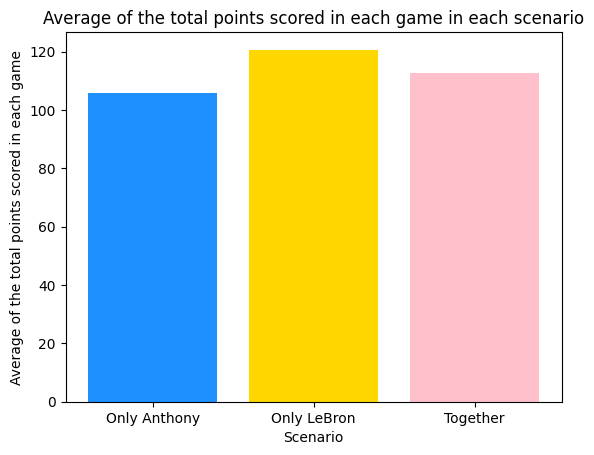

In [22]:
cases = ['Only Anthony', 'Only LeBron', 'Together']
data_points = [105.67, 120.625, 112.7]

plt.bar(cases, data_points, color=['dodgerblue', 'gold', 'pink'])

plt.xlabel('Scenario')
plt.ylabel('Average of the total points scored in each game')
plt.title('Average of the total points scored in each game in each scenario')

plt.show()

T-test to check difference between means

In [11]:
from scipy.stats import ttest_ind

In [13]:
# Between only Anthony and only LeBron
t_statistic, p_value = ttest_ind(group1_sum, group2_sum)
print("T-statistic: ", t_statistic)
print("p-value: ", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the means.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic:  -2.5446348998750916
p-value:  0.03147054898564897
Reject the null hypothesis: There is a significant difference between the means.


In [14]:
# Between only Anthony and both
t_statistic, p_value = ttest_ind(group1_sum, group3_sum)
print("T-statistic: ", t_statistic)
print("p-value: ", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the means.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic:  -1.0232586334231855
p-value:  0.30923192663184546
Fail to reject the null hypothesis: There is no significant difference between the means.


In [15]:
# Between only LeBron and together
t_statistic, p_value = ttest_ind(group2_sum, group3_sum)
print("T-statistic: ", t_statistic)
print("p-value: ", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the means.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic:  1.8583505864747778
p-value:  0.06654038746096211
Fail to reject the null hypothesis: There is no significant difference between the means.


Findings:
When LeBron played by himself, the average total points in a match is higher than when they play together and when only Anthony played. However, our t-test result showed that only between the case when ‘only LeBron played’ and ‘both of them played’, there is a significant difference between the means of the two groups. In the other 2 cases, there is no significant difference between the means.

Insights:
1. In the case where both LeBron and Anthony played the game, it is possible that the opponent plays so well, so both of the Star players need to be on stage to try to get higher points. However, since the opponent plays so well, it is harder to get higher points in the game, leading to the average points in 'Together' case being lower than the case when only LeBron played.
2. Anthony Davis's impact on scoring appears to complement LeBron's, as their combined play does not significantly change the scoring average compared to when Anthony plays alone.
3. LeBron does not play better than Anthony necessarily, but LeBron plays better himself compared to playing with Anthony. As a result, Lakers should consider having LeBron or LeBron and Anthony playing together in future matches.




---



## Part B

We want to see if the star players make their teammates play better. Specifically, I used the corrlation between the points get from Anthony or LeBron assisting and the total points in that match.

In [7]:

# Step 1: Filter the DataFrame for rows where the 'assist' column contains 'LeBron James'
lebron_assist_data = df[df['assist'] == 'LeBron James']

# Step 2: Group the data by 'game_id' and aggregate the 'points' column
lebron_assist_points = lebron_assist_data.groupby('game_id')['points'].sum()

# Step 3: Merge the total assist points with the total game points
game_summary = df[['game_id', 'points']].groupby('game_id').sum()

# Step 4: Merge the total assist points with the total game points on 'game_id'
lebron_game_summary = pd.merge(game_summary, lebron_assist_points, on='game_id', how='left')

# Rename the columns
lebron_game_summary.rename(columns={'points_x': 'total_points', 'points_y': 'assist_points'}, inplace=True)

# Step 5: Fill NaN values with 0 for games where LeBron had no assists
lebron_game_summary['assist_points'] = lebron_game_summary['assist_points'].fillna(0)

# Print the resulting DataFrame
print(lebron_game_summary)



               total_points  assist_points
game_id                                   
'0021900659           100.0           11.0
'0021900667           128.0           25.0
'0021900684            91.0           20.0
'0021900726           119.0           23.0
'0021900736           129.0           28.0
...                     ...            ...
="0021900553"         117.0           12.0
="0021900572"         129.0           18.0
="0021900580"         125.0            0.0
="0021900597"         128.0           17.0
="0021900633"         124.0           29.0

[92 rows x 2 columns]


In [8]:
# Step 1: Filter the DataFrame for rows where the 'assist' column contains 'LeBron James'
Anthony_assist_data = df[df['assist'] == 'Anthony Davis']

# Step 2: Group the data by 'game_id' and aggregate the 'points' column
Anthony_assist_points = Anthony_assist_data.groupby('game_id')['points'].sum()

# Step 3: Merge the total assist points with the total game points
game_summary = df[['game_id', 'points']].groupby('game_id').sum()

# Step 4: Merge the total assist points with the total game points on 'game_id'
Anthony_game_summary = pd.merge(game_summary, Anthony_assist_points, on='game_id', how='left')

# Rename the columns
Anthony_game_summary.rename(columns={'points_x': 'total_points', 'points_y': 'assist_points'}, inplace=True)

# Step 5: Fill NaN values with 0 for games where LeBron had no assists
Anthony_game_summary['assist_points'] = Anthony_game_summary['assist_points'].fillna(0)

# Print the resulting DataFrame
print(Anthony_game_summary)


               total_points  assist_points
game_id                                   
'0021900659           100.0           12.0
'0021900667           128.0            6.0
'0021900684            91.0            4.0
'0021900726           119.0           14.0
'0021900736           129.0           17.0
...                     ...            ...
="0021900553"         117.0           12.0
="0021900572"         129.0            0.0
="0021900580"         125.0            0.0
="0021900597"         128.0            0.0
="0021900633"         124.0            0.0

[92 rows x 2 columns]


In [9]:
#correlation
#lebron
lebron_correlation = lebron_game_summary['total_points'].corr(lebron_game_summary['assist_points'])
lebron_correlation

0.2681136372068255

In [10]:
#anthony
Anthony_correlation = Anthony_game_summary['total_points'].corr(Anthony_game_summary['assist_points'])
Anthony_correlation

-0.0007089982135406187

<Axes: xlabel='assist_points', ylabel='total_points'>

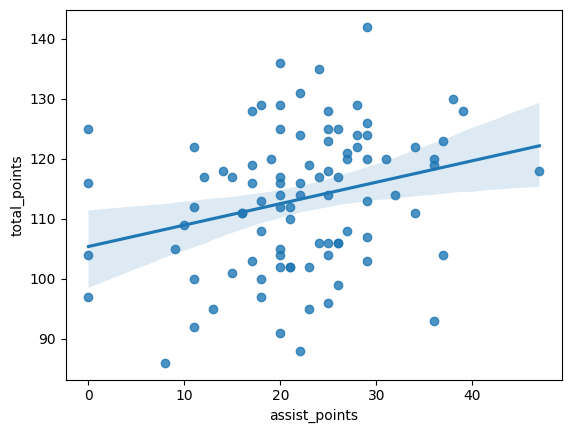

In [16]:
sns.regplot(data = lebron_game_summary,
                x = 'assist_points',
                y = 'total_points')

<Axes: xlabel='assist_points', ylabel='total_points'>

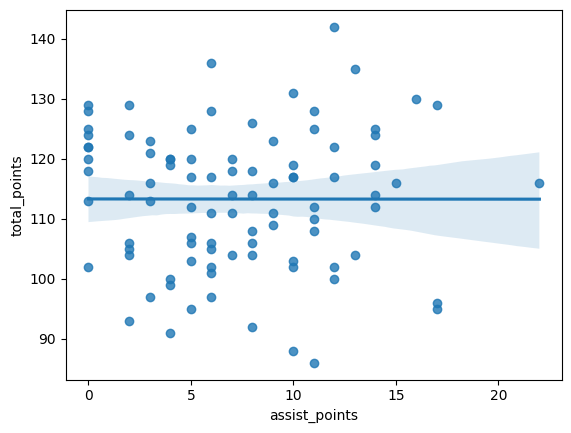

In [17]:
sns.regplot(data = Anthony_game_summary,
                x = 'assist_points',
                y = 'total_points')

Findings:
1. The correlation between the points scored with the assistance from LeBron and the total points get in the match is 0.26, which is a positive correlation. It seems that the more points the team get from LeBron assisting the action, the more total points the team will get in the game. Thus, LeBron makes the team better off.
2. However, the correlation for Anthony assisting is negative but almost 0, which means there's no clear correlation between the points scored with assistance from Anthony and the total points get in the match. As a result, Anthony's assistance doesn't make the team better.